<a href="https://colab.research.google.com/github/databyhuseyn/DeepLearning/blob/main/Crack_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and preprocess dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="flnQpc80x7Dw7O7u1Bhg")
project = rf.workspace("ensi-swy06").project("concrete-cracks-detection-kyzaz")
version = project.version(7)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Concrete-Cracks-Detection-7 in yolov11:: 100%|██████████| 24766/24766 [00:04<00:00, 5250.89it/s]


In [ ]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py

--2024-10-24 08:26:36--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-10-24 08:26:37 (17.7 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves, unzip_data

In [ ]:
unzip_data('/content/Conglomerate Concrete Crack Detection.zip')

In [ ]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 8

train_images_dir = '/content/Conglomerate Concrete Crack Detection/Train/images'
train_masks_dir = '/content/Conglomerate Concrete Crack Detection/Train/masks'
test_images_dir = '/content/Conglomerate Concrete Crack Detection/Test/images'
test_masks_dir = '/content/Conglomerate Concrete Crack Detection/Test/masks'


def load_data(image_dir, mask_dir, img_size):
    images, masks = [], []

    # Loop over images and masks
    for filename in os.listdir(image_dir):
        # Load image
        img = load_img(os.path.join(image_dir, filename), target_size=img_size)
        img = img_to_array(img) / 255.0  # Normalize to [0,1]
        images.append(img)

        # Load corresponding mask
        mask = load_img(os.path.join(mask_dir, filename), target_size=img_size, color_mode="grayscale")
        mask = img_to_array(mask) / 255.0  # Normalize to [0,1]
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load train and test data
X_train, y_train = load_data(
    train_images_dir,
    train_masks_dir,
    IMG_SIZE
)

X_test, y_test = load_data(
    test_images_dir,
    test_masks_dir,
    IMG_SIZE
)

print(f'Train images shape: {X_train.shape}, Train masks shape: {y_train.shape}')
print(f'Test images shape: {X_test.shape}, Test masks shape: {y_test.shape}')


Train images shape: (9899, 128, 128, 3), Train masks shape: (9899, 128, 128, 1)
Test images shape: (1096, 128, 128, 3), Test masks shape: (1096, 128, 128, 1)


# Data Visualization

In [ ]:
  plt.subplot??

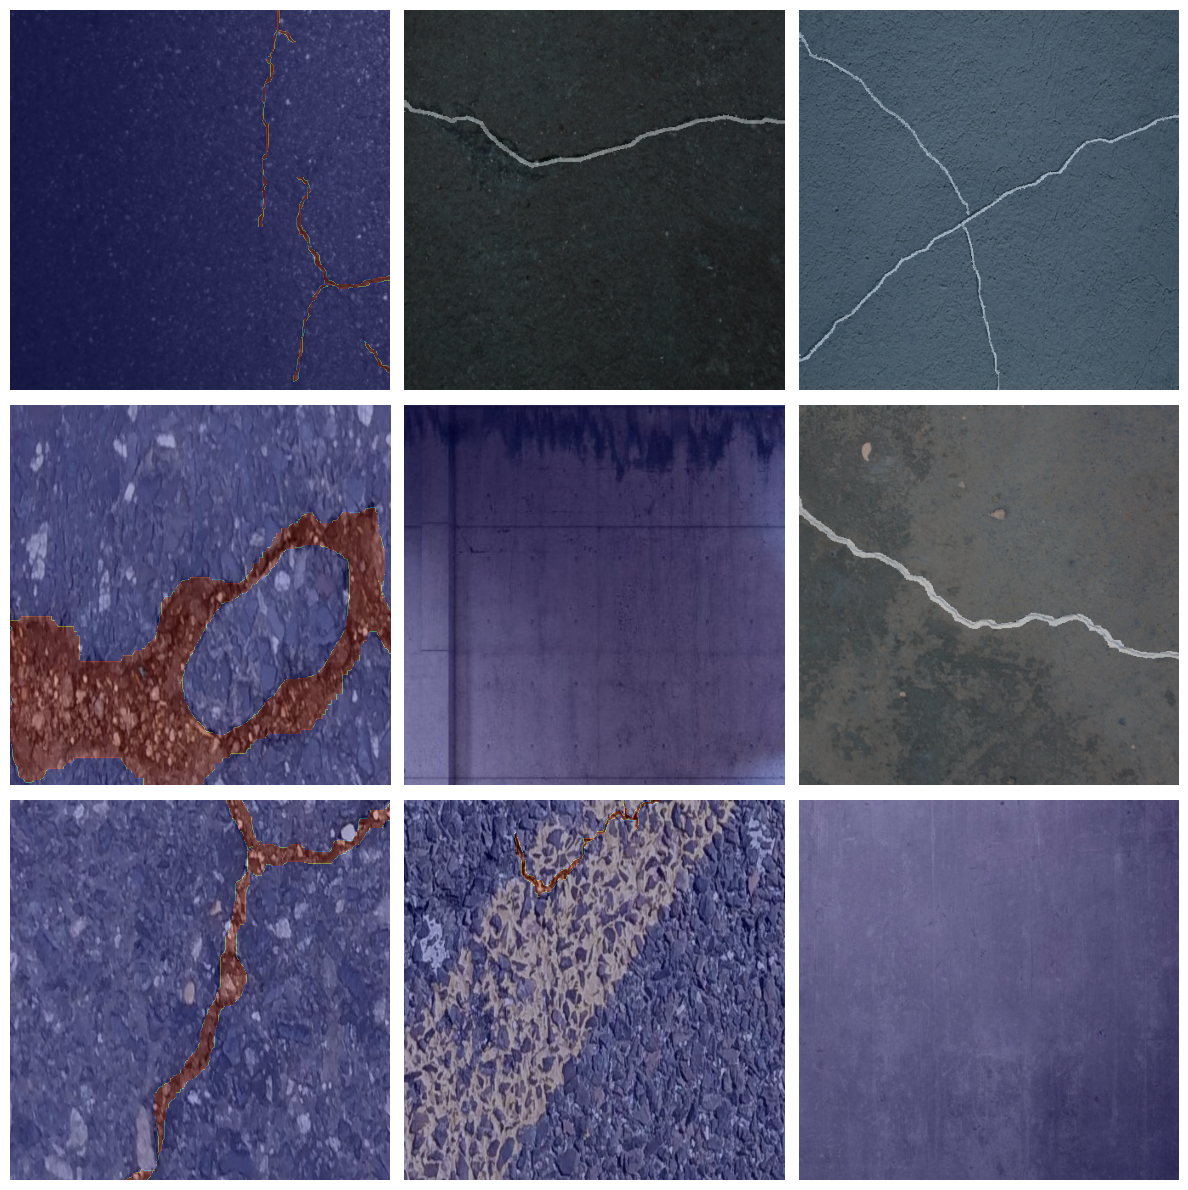

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths
train_images_dir = '/content/Conglomerate Concrete Crack Detection/Train/images'
train_masks_dir = '/content/Conglomerate Concrete Crack Detection/Train/masks'

# Get list of images and masks
image_files = os.listdir(train_images_dir)

# Set up the 3x3 grid for images and masks
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i in range(9):
    # Randomly select an image/mask pair
    n = np.random.randint(len(image_files))
    image_path = os.path.join(train_images_dir, image_files[n])
    mask_path = os.path.join(train_masks_dir, image_files[n])  # Assuming filenames are the same

    # Load the image and mask
    img = plt.imread(image_path)
    mask = plt.imread(mask_path)

    # Plot the image and mask side by side
    ax = axes[i // 3, i % 3]  # Find the right subplot
    ax.imshow(img, cmap='gray')  # Show image
    ax.imshow(mask, cmap='jet', alpha=0.35)  # Overlay mask with transparency

    ax.axis('off')  # Hide axes

# Display the grid of images
plt.tight_layout()
plt.show()


# Create Model

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

def create_unet_model(input_shape=(128, 128, 3)):

  inputs = tf.keras.layers.Input(shape=input_shape)
  conv2d_0 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
  conv2d_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2d_0)            # birleshdir
  max_pool_0 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv2d_1)
  conv2d_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(max_pool_0)
  conv2d_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2d_2)            # birleshdir
  max_pool_1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv2d_3)
  conv2d_4 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(max_pool_1)
  conv2d_5 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2d_4)            # birleshdir
  max_pool_2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv2d_5)
  conv2d_6 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(max_pool_2)
  conv2d_7 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2d_6)            # birleshdir
  max_pool_3 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv2d_7)
  conv2d_8 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(max_pool_3)
  conv2d_9 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2d_8)
  up_conv_0 = tf.keras.layers.Conv2DTranspose(filters=512, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv2d_9)
  up_conv_0_resized = tf.keras.layers.Lambda(lambda x: tf.image.resize(x, size=(up_conv_0.shape[1], up_conv_0.shape[2])))(conv2d_7)

  concat_0 = tf.keras.layers.concatenate([up_conv_0_resized, up_conv_0], axis=3)
  conv2d_10 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(concat_0)
  conv2d_11 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2d_10)
  up_conv_1 = tf.keras.layers.Conv2DTranspose(filters = 256, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv2d_11)
  up_conv_1_resized = tf.keras.layers.Lambda(lambda x: tf.image.resize(x, size=(up_conv_1.shape[1], up_conv_1.shape[2])))(conv2d_5)

  concat_1 = tf.keras.layers.concatenate([up_conv_1_resized, up_conv_1], axis=3)
  conv2d_12 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(concat_1)
  conv2d_13 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2d_12)
  up_conv_2 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv2d_13)
  up_conv_2_resized = tf.keras.layers.Lambda(lambda x: tf.image.resize(x, size=(up_conv_2.shape[1], up_conv_2.shape[2])))(conv2d_3)

  concat_2 = tf.keras.layers.concatenate([up_conv_2_resized, up_conv_2], axis=3)
  conv2d_14 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(concat_2)
  conv2d_15 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2d_14)
  up_conv_3 = tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv2d_15)
  up_conv_3_resized = tf.keras.layers.Lambda(lambda x: tf.image.resize(x, size=(up_conv_3.shape[1], up_conv_3.shape[2])))(conv2d_1)

  concat_3 = tf.keras.layers.concatenate([up_conv_3_resized, up_conv_3], axis=3)
  conv2d_16 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(concat_3)
  conv2d_17 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2d_16)
  conv2d_18 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2d_17)
  outputs = tf.keras.layers.Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid')(conv2d_18)

  unet_model = tf.keras.Model(inputs, outputs, name='Unet-remake')
  return unet_model

In [ ]:
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)
input_shape

(128, 128, 3)

In [ ]:
unet_model = create_unet_model(input_shape=input_shape)

In [ ]:
unet_model.summary()

Model: "Unet-remake"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 32)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 128)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 256)    │        590,080 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 256)      │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 8, 8, 256)      │        590,080 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 8, 8, 256)      │        590,080 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 16, 16, 256)    │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 512)    │        524,800 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├──────────────────────

 Total params: 9,319,041 (35.55 MB)

 Trainable params: 9,319,041 (35.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tf.keras.utils.plot_model(unet_model, show_shapes=True)

# Let's fit the model

In [ ]:
# Add model checkpoint and early stopping
model_ckp = tf.keras.callbacks.ModelCheckpoint('/content/best_model.weights.h5',
                                               save_best_only=True,
                                               save_weights_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(restore_best_weights=True,
                                                  patience=3)

In [ ]:
unet_model.compile(loss='binary_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                   metrics=['accuracy'])

In [ ]:
history = unet_model.fit(X_train, y_train,
                         epochs=10,
                         validation_data=(X_test, y_test),
                         callbacks=[model_ckp, early_stopping])

Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 185s 457ms/step - accuracy: 0.9542 - loss: 0.1694 - val_accuracy: 0.9638 - val_loss: 0.0892
Epoch 2/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 106s 267ms/step - accuracy: 0.9652 - loss: 0.0789 - val_accuracy: 0.9676 - val_loss: 0.0665
Epoch 3/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 142s 266ms/step - accuracy: 0.9689 - loss: 0.0633 - val_accuracy: 0.9682 - val_loss: 0.0636
Epoch 4/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 144s 274ms/step - accuracy: 0.9703 - loss: 0.0557 - val_accuracy: 0.9701 - val_loss: 0.0549
Epoch 5/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 142s 274ms/step - accuracy: 0.9710 - loss: 0.0516 - val_accuracy: 0.9711 - val_loss: 0.0505
Epoch 6/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 140s 266ms/step - accuracy: 0.9718 - loss: 0.0480 - val_accuracy: 0.9712 - val_loss: 0.0479
Epoch 7/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 144s 273ms/step - accuracy: 0.9718 - loss: 0.0460 - val_accuracy: 0.9710 - val_loss: 0.0493
Epoch 8/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 140s 265ms/step - accuracy: 0.9720 -

As you can see above, even there's not data augmentation (since computational resources are scarce, so I tried to augment the data, but it crashed) it still performs really good and doesn't overfit.

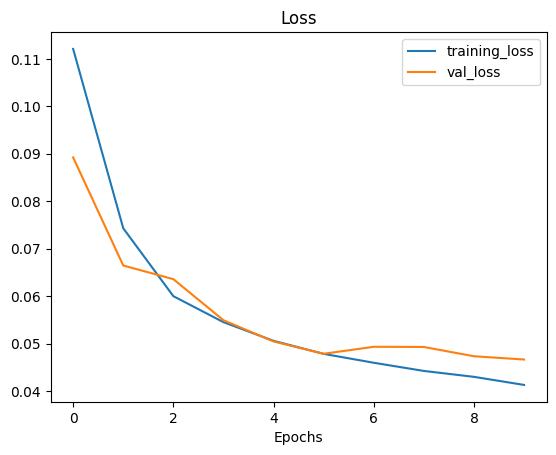

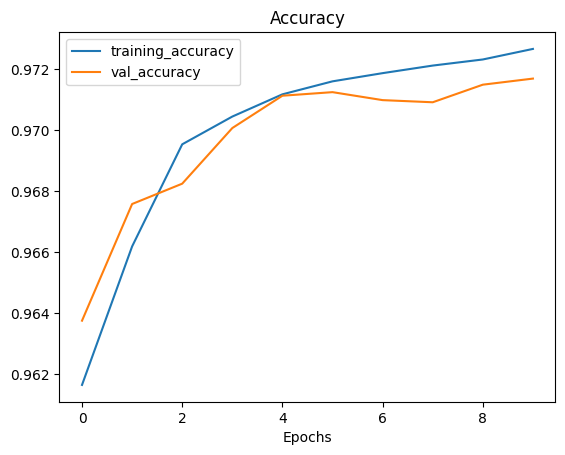

In [ ]:
plot_loss_curves(history)

data visualization, other kind of segmentation models

In [ ]:
img_path = '/content/cracked_concrete.jpg'
new_img = load_img(img_path, target_size=IMG_SIZE)
new_img = img_to_array(new_img) / 255.0  # Normalize to [0,1]

In [ ]:
pred = unet_model(tf.expand_dims(new_img, axis=0))

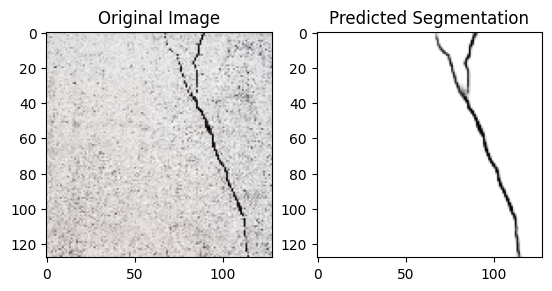

In [ ]:
original_img = '/content/cracked_concrete.jpg'
or_img = plt.imread(original_img)
or_img = load_img(original_img, target_size=IMG_SIZE)
or_img = img_to_array(or_img) / 255.0

plt.subplot(121)
plt.imshow(or_img)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(tf.squeeze(pred), cmap='binary')
plt.title('Predicted Segmentation')
plt.show()